# Семинар: Задача Ранжирования (Learning To Rank)

## В чем состоит задача ранжирования (LTR)?

<img src="images/start_image.jpg" width="600" height="400">

### Задача Регрессии vs Задача Классификации vs Задача Ранжирования

### Регрессия

Ищем функцию регрессии $f(x)$, которая для данного вектора признаков $x \in \mathbb{R^n}$ позволяет оценить некоторую величину $y \in \mathbb{R}$.

### Классификация

Ищем функцию $f(x)$, которая для данного вектора признаков $x \in \mathbb{R^n}$ позволяет оценить дискретную целочисленную метку $y \in \{1,2,...,N\}$, где $N$ общее число классов.

### Ранжирование

Ищем функцию $f(q,D)$, которая для данного запросе $q$ и релевантного списка объектов $D$ оценивает порядок объектов из списка.

Одна из отличительных особенностей задачи ранжирования от классических задач машинного обучения заключается в том, что качество результата зависит не от предсказанных оценок релевантности, а от порядка следования документов в рамках конкретного запроса, т.е. важно не абсолютное значение релевантности (его достаточно трудно формализовать в виде числа), а то, более или менее релевантен документ, относительно других документов.

### Подходы к решению задачи ранжирования
Существуют 3 основных подхода к ранжированию, различие между которыми заключается в том, на какую функцию потерь они опираются:
  
1. **Поточечный подход (pointwise)**. В этом подходе предполагается, что каждой паре запрос-документ поставлена в соответствие численная оценка. Задача обучения ранжированию сводится к построению регрессии (или классификации): для каждой отдельной пары запрос-документ необходимо предсказать её оценку. В современной литературе $f(q,d_i)$ называют точечной функцией оценки, а $f(q,D)$ - групповой функцией оценки.
<details>
<summary> <strong>Ответ</strong> </summary>
    
    - Преимущества:
        - Простота. Существующие ML модели можно использовать.
    - Недостатки:
        - Для обучающего набора данных требуются явные точечные метки.
        - Результат обычно является неоптимальным из-за того, что не используется полная информация обо всем списке подходящих документов для каждого запроса.
    
</details>
    
2. **Попарный подход (pairwise)**. В таком подходе обучение ранжированию сводится к построению бинарного классификатора, которому на вход поступают два документа, соответствующих одному и тому же запросу, и требуется определить, какой из них лучше. Другими словами, функция потерь штрафует модель, если отранжированная этой моделью пара документов оказалась в неправильном порядке.
<details>
<summary> <strong>Ответ</strong> </summary>
    
    - Преимущества:
        - Модель учится непосредственно ранжировать, хотя и только попарно, но теоретически она может приблизить производительность общей задачи ранжирования, заданной N документами в согласованном списке.
        - Нам не нужны явные точечные метки. Требуются только парные предпочтения. Это преимущество, поскольку иногда мы можем определить парные предпочтения только на основе собранных данных о поведении пользователей.
    - Недостатки:
        - Сама функция оценки по-прежнему является точечной, относительная информация в пространстве признаков среди различных документов, заданных одним и тем же запросом, все еще не используется в полной мере. 
</details>

3. **Списочный подход (listwise)**. Его суть заключается в построении модели, на вход которой поступают сразу все документы, соответствующие запросу, а на выходе получается их перестановка.
    Первым в истории предложенным списочным подходом является ListNet. Объясним, как он подходит к задаче ранжирования. В основе ListNet лежит концепция вероятности перестановки при наличии ранжированного списка. Мы предполагаем, что существует точечная функция $f(q,d_i)$, используемая для оценки и следовательно ранжирования заданного списка элементов. Но вместо моделирования вероятности попарного сравнения с помощью разницы оценки, теперь мы хотим смоделировать вероятность всего результата ранжирования.
<details>
<summary> <strong>Ответ</strong> </summary>

    - Преимущества:
        - Теоретически обоснованное решение для подхода к задаче ранжирования.
    - Недостатки:
        - Дорого вычислить в теоретической форме, поэтому на практике используется несколько приближений.
        - Функция оценки по-прежнему является точечной, что может быть неоптимальным.

</details>

<img src="images/approaches.jpg" width="1000" height="400">

### Оценка качества

Как оценивать качество решения задачи ранжирования?

Для оценки модели ранжирования было предложено и обычно используется несколько метрик:

- Binary Relevance
    - Mean Average Precision (MAP)
    - Mean Reciprocal Rank (MRR)
- Graded Relevance
    - Expected Reciprocal Rank (ERR)
    - Normalized Discounted Cumulative Gain (NDCG)
    


### Mean Average Precision.
MAP - это мера, основанная на бинарной метке релевантности. 
Сначала нам нужно определить точность при $k$ для запроса $P@k(q)$ как:
$$
P@k(q) = \frac{\sum_{i=1}^k r_i}{k}
$$
для упорядоченного списка предсказаний $r_i$ для всех $k$ объектов. $r_i=1$ если объект релевантен, $0$ иначе.

Затем мы определяем среднюю точность для данного запроса

$$
AP(q)@k = \frac{1}{\sum_{i=1}^k r_i} \sum_{i=1}^k P@i(q) \times r_i
$$

<img src="images/AP.png" width="600" height="400">

$MAP$ - среднее значение $AP(q)$ для всех запросов:

$$
MAP = \frac{\sum_{q=1}^Q AP(q)}{Q}
$$

Обратите внимание, что $MAP$ чувствителен к порядку из-за введения члена $r_i$ в расчет $AP$. Интуитивно понятно, что он вычисляет среднее значение точности на каждой позиции ранжирования, но штрафует точность на позициях с нерелевантными элементами, просто устанавливая их в нули.

**Пример:**

$
\begin{matrix}
q_{1} & \rightarrow & {d_{1},d_{2}} \\
q_{2} & \rightarrow & {d_{3},d_{4},d_{5}} \\
\end{matrix}
$

Предположим $d_2, d_3, d_5$ являются релевантными документами для соответствующих запросов.

<details>
<summary> <strong>Ответ</strong> </summary>

$AP$ для запроса $q_{1}$ $\frac{1}{1} \times (\frac{0}{1} \times 0 + \frac{1}{2} \times 1) = \frac{1}{2}$   

$AP$ для запроса $q_{2}$ $\frac{1}{2} \times (\frac{1}{1} \times 1 + \frac{1}{2} \times 0 + \frac{2}{3} \times 1) = \frac{5}{6}$

$MAP:$ $\frac{1}{2} \times (\frac{1}{2} + \frac{5}{6}) \approx 67\%$
</details>


### Reciprocal Rank. Mean Reciprocal Rank. Expected Reciprocal Rank.

#### Reciprocal Rank

Reciprocal Rank фокусируется на первом правильно предсказанном релевантном элементе в списке. Учитывая ранжированный список, предположим, что $r_i$ - это ранг самого высокого релевантного элемента. Скажем, если 2-й элемент является первым релевантным элементом в списке, Reciprocal Rank для этого запроса равен $1/2$.

#### Mean Reciprocal Rank

По определению для каждого запроса мы можем расчитать Reciprocal Rank. Mean Reciprocal Rank это средний Reciprocal Rank для всех запросов:

$$MRR = \frac{1}{Q}\sum\limits_{i = 1}^{Q}\frac{1}{r_{i}}$$

<img src="images/MRR.png" width="600" height="400">

#### Expected Reciprocal Rank

В основе обоснования лежит эмпирический вывод из задачи веб-поиска: вероятность того, что пользователь изучит документ с рангом i, зависит от того, насколько он был удовлетворен ранее просмотренными документами в списке. Таким образом, ERR пытается количественно оценить полезность документа с рангом i в зависимости от степени релевантности документов с рангом меньше i.

$\prod\limits_{i = 1}^{r - 1}(1 - R_{i})R_{r}$

Теперь мы смоделируем $R_i$ так, чтобы она была возрастающей функцией релевантности:
$$
R = R(g) \equiv \frac{2^g - 1}{2^{g_{max}}}
$$
где $g \in \{ 0,1,...,g_{max}\}$

$$
ERR \equiv \sum_{r=1}^n\frac{1}{r}R_r\prod_{i=1}^{r-1}(1-R_i)
$$

Обратите внимание, что $ERR$ - это мера для списка с одним запросом, чтобы оценить результатов по нескольким запросам, нам нужно будет дополнительно усреднить ERR между запросами.

**Пример:**

$
\begin{matrix}
q_{1} & \rightarrow & {d_{1},d_{2}} \\
q_{2} & \rightarrow & {d_{3},d_{4},d_{5}} \\
\end{matrix}
$

Предположим $d_2, d_3, d_5$ являются релевантными документами для соответствующих запросов.

<details>
<summary> <strong>Ответ</strong> </summary>

$MRR$ : $(\frac{1}{2} + \frac{1}{1}) \times \frac{1}{2} = \frac{3}{4}$
    
$ERR$ для запроса ${q_1}$ : $0 + \frac{1}{2} \times \frac{2^{1} - 1}{2^{1}} \times (1 - \frac{2^{0} - 1}{2^{1}}) = \frac{1}{4}$

$ERR$ для запроса ${q_2}$ : $\frac{1}{1} \times \frac{2^{1} - 1}{2^{1}} + 0 + \frac{1}{3} \times \frac{2^{1} - 1}{2^{1}} \times (1 - \frac{2^{0} - 1}{2^{1}}) \times (1 - \frac{2^{1} - 1}{2^{1}}) = \frac{7}{12}$
    
</details>

#### Normalized Discounted Cumulative Gain.

Сначала мы определим Cumulative Gain (CG) в позиции k как:

$$CG@k = \sum_{i=1}^k {r}_i$$

<img src="images/CG.png" width="600" height="400">

Далее мы определим Discounted Cumulative Gain (DCG) в позиции k как:

$$DCG@k = \sum_{i=1}^k\frac{{r}_i}{log_2(i + 1)}$$

$$DCG@k = \sum_{i=1}^k\frac{2^{r_i} - 1}{log_2(i + 1)}$$

где ${r_i}$ - градация релевантности на ранге $i$.

<img src="images/DCG.png" width="600" height="400">

Чтобы интуитивно понять метрику, числитель - это просто возрастающая функция релевантности, чем больше релевантность, тем выше. Это выигрыш от каждого элемента. Знаменатель - это убывающая функция позиции в рейтинге, это дисконтированный компонент метрики. Вместе взятые, более высокая релевантность дает больше очков, но чем ниже позиция в рейтинге, тем больше скидка. В итоге метрика предпочтет, чтобы более релевантный элемент был ранжирован выше, что является именно тем желаемым свойством ранжирования, к которому мы хотели бы стремиться.

Нормализованный DCG (NDCG) определяется как

$$NDCG@k = \frac{DCG@k}{IDCG@k}$$

где $IDCG@k$ - идеальный $DCG@k$ с учетом результата. Это $DCG@k$, вычисленный путем пересортировки данного списка по его истинным меткам релевантности. То есть $IDCG@k$ - это максимально возможное значение $DCG@K$, которое можно получить, учитывая ранжированный список.

<img src="images/NDCG_1.png" width="600" height="400">

<img src="images/NDCG_2.png" width="600" height="400">

**Пример:**

$
\begin{matrix}
q_{1} & \rightarrow & {d_{1},d_{2}} \\
q_{2} & \rightarrow & {d_{3},d_{4},d_{5}} \\
\end{matrix}
$

Предположим $d_2, d_3, d_5$ являются релевантными документами для соответствующих запросов.

<details>
<summary> <strong>Ответ</strong> </summary>

$NDCG$ для запроса $q_1$ : $\frac{0 + \frac{2^{1} - 1}{log_{2}3}}{\frac{2^{1} - 1}{log_{2}2} + 0} = \frac{1}{log_{2}3} \approx 0.631$

$NDCG$ для запроса $q_2$ : $\frac{\frac{2^{1} - 1}{log_{2}2} + 0 + \frac{2^{1} - 1}{log_{2}4}}{\frac{2^{1} - 1}{log_{2}2} + \frac{2^{1} - 1}{log_{2}3} + 0} = \frac{1.5}{1 + \frac{1}{log_{2}3}} \approx 0.92$
    
</details>

## Эволюция подходов

### От поточечного подхода к попарному подходу

Ряд очень важных теоретических и эмпирических работ был выполнен [Крисом Берджесом](http://chrisburges.net/) из Microsoft Research, который заложил основы попарного подхода в LTR.

-   RankNet    (2005)
-   LambdaNet  (2006)
-   LambdaMART (2007); высококачественная реализация доступна в библиотеке [`lightgbm`](https://github.com/Microsoft/LightGBM)


### От попарного подхода к списочному подходу и далее

Исследователи из Google обобщили подход LambdaMART для теоретического обоснования модели ранжирования всех 3 типов функций потерь (поточечных, попарных, списочных) и прямой оптимизации всех популярных метрик ранжирования (NDCG, MAP, ...). Подход называется LambdaLoss (2018).



## Подход RankNet

$$ Pr(i \succ j) = P_{ij} \equiv \frac{1}{1 + e^{-(s_i - s_j)}}, где \; s_i = f(q, d_i), s_j = f(q, d_j)$$

Для упрощения изложения материала пусть  $f(q,d_{i}) = wx_{i}$, обычная линейная модель

$$L = - \sum\limits_{i \neq j}{y_{ij}log_{2}P_{ij} + (1 - y_{ij})log_{2}(1 - P_{ij})}, где \; y_{ij} \in \{ 0,1\}$$

## Подход LambdaNet

При переходе от RankNet к LambdaNet были сделаны два важных усовершенствования.

1.  Ускорение обучения благодаря факторизации вычисления градиента
2.  Оптимизация под метрику ранжирования

### Факторизация градиента

Что касается первого пункта, LambdaNet - это **улучшенная версия RankNet**. Улучшение основано на факторизации вычисления градиента функции потерь, под его парным контекста обновления.

$$L = y_{ij}log_{2}P_{ij} + (1 - y_{ij})log_{2}(1 - P_{ij})$$

$$
\frac{\partial L}{\partial w_k} = \frac{\partial L}{\partial s_i} \frac{\partial s_i}{\partial w_k} + \frac{\partial L}{\partial s_j} \frac{\partial s_j}{\partial w_k}
$$

$$
\begin{align}
\frac{\partial L_T}{\partial w_k} 
&= \sum_{\{i, j\}} \bigg[ \frac{\partial L}{\partial s_i} \frac{\partial s_i}{\partial w_k} + \frac{\partial L}{\partial s_j} \frac{\partial s_j}{\partial w_k} \bigg] \\
&= \sum_i \frac{\partial s_i}{\partial w_k} \bigg( \sum_{\forall j \prec i} \frac{\partial L(s_i, s_j)}{\partial s_i} \bigg) + \sum_j \frac{\partial s_j}{\partial w_k} \bigg( \sum_{\forall i \succ j} \frac{\partial L(s_i, s_j)}{\partial s_j} \bigg)
\end{align}
$$

$$
\frac{\partial L(s_i, s_j)}{\partial s_i} = - \frac{\partial L(s_i, s_j)}{\partial s_j} = log_2e\big[(1 - y_{ij}) - \frac{1}{1 + e^{s_i - s_j}}\big],
$$

$$
\begin{align}
\frac{\partial L_T}{\partial w_k} 
&= \sum_i \frac{\partial s_i}{\partial w_k} \bigg[ \sum_{\forall j \prec i} \frac{\partial L(s_i, s_j)}{\partial s_i} + \sum_{\forall j \prec i} \frac{\partial L(s_j, s_i)}{\partial s_i} \bigg] \\
&= \sum_i \frac{\partial s_i}{\partial w_k} \bigg[ \sum_{\forall j \prec i} \frac{\partial L(s_i, s_j)}{\partial s_i} - \sum_{\forall j \succ i} \frac{\partial L(s_j, s_i)}{\partial s_j} \bigg] \\
&= \sum_i \frac{\partial s_i}{\partial w_k} \lambda_i
\end{align}
$$

Интуиция, лежащая в основе вышеуказанного градиента:

> Для каждого документа в данном запросе существует компонент вектора градиента, который мы 
> обозначили как лямбда, которая вычисляется путем рассмотрения всех превосходящих
> и низшие документы по сравнению с ним. Относительно худший документ
> будет толкать текущий документ вверх, а относительно лучший документ будет
> сдвинет его вниз.

Следствием вышеприведенной факторизации является то, что во время обучения вместо обновления по каждой паре документов, мы можем
обновлять по каждому запросу. А поскольку лямбда намного дешевле в вычислении вычисление, весь процесс обучения может значительно ускориться.

### Оптимизация метрики ранжирования

Поскольку мы моделируем разницу в баллах пары документов в запросе как
мера вероятности, модель оптимизирует корректность попарного
ранжирования, что может не быть конечной желаемой целью.

Помните, что цель ранжирования действительно измеряется с помощью
позиционно-чувствительной градуированной мерой, такой как NDCG. Но в приведенной выше схеме
NDCG не связана напрямую с минимизацией перекрестной энтропии. A
прямое и также простое решение - использовать NDCG в качестве критерия ранней остановки
и определять его с помощью валидационного набора данных.

LambdaRank предлагает еще одно решение. Исследователь обнаружил, что
во время обновления градиента с использованием понятия лямбда, для каждой пары
вместо вычисления только лямбды, мы можем скорректировать лямбду на
изменению NDCG для этой пары при условии, что позиции двух элементов
поменялись местами друг с другом.

Лямбда данного документа - это:

$$
\begin{align}
\lambda_i 
&= \bigg[ \sum_{\forall j \prec i} \frac{\partial L(s_i, s_j)}{\partial s_i} - \sum_{\forall j \succ i} \frac{\partial L(s_j, s_i)}{\partial s_j} \bigg] \\
&= \bigg[ \sum_{\forall j \prec i} \lambda_{ij} - \sum_{\forall j \succ i} \lambda_{ij} \bigg]
\end{align}
$$

Предлагаемый метод заключается в корректировке парной лямбды $\lambda_{ij}$:

$$
\lambda_{ij} \equiv \frac{\partial L(s_i, s_j)}{\partial s_i} \cdot |\Delta NDCG_{ij}|
$$
,где $\Delta NDCG_{ij}$ есть изменение $NDCG$, когда позиции $i$ и $j$ меняются местами.

Было обнаруженно, что благодаря такой корректировке, без теоретического доказательства, модель эмпирически оптимизирует NDCG, и, следовательно, дает лучшие общие результаты.

## Псевдокод алгоритма

<img src="images/LambdaMART.jpg" width="600" height="400">

## Пример задачи

In [17]:
import xgboost as xgb
import pandas  as pd
import scipy   as sp
import numpy   as np

import matplotlib
import graphviz
import math

## Набор данных

Используемые нами данные - это набор данных Microsoft MSLR-10K, который можно загрузить (https://www.microsoft.com/en-us/research/project/mslr/).

Данные представляют собой набор данных LETOR (LEarning TO Rank) в виде: reference table (т.е. рейтинг, присвоенный человеком), <query id, query-url> (длина 136 feature vec)". Она обычно используется для бенчмаркинга при обучении ранжированию. 



Пример строки из набора данных

2 qid:\<query_id\> \<url:feature_vector\>

2 qid:13 1:2 2:0 3:2 4:1 5:2 6:1 7:0 8:1 9:0.50000 10:1 11:31 12:0 13:11 14:7 15:49 16:6.553125 17:15.011174 18:12.950828 19:14.369216 20:6.550869 21:4 22:0 23:2 24:1 25:7 26:2 27:0 28:1 29:0 30:3 31:2 32:0 33:1 34:1 35:4 36:2 37:0 38:1 39:0.50000 40:3.50000 41:0 42:0 43:0 44:0.25000 45:0.25000 46:0.129032 47:0 48:0.181818 49:0.142857 50:0.142857 51:0.064516 52:0 53:0.090909 54:0 55:0.061224 56:0.064516 57:0 58:0.090909 59:0.142857 60:0.081633 61:0.064516 62:0 63:0.090909 64:0.071429 65:0.071429 66:0 67:0 68:0 69:0.005102 70:0.000104 71:13.106251 72:0 73:12.950828 74:6.829093 75:22.821554 76:6.340183 77:0 78:6.129836 79:0 80:10.145764 81:6.766068 82:0 83:6.820992 84:6.829093 85:12.67579 86:6.553125 87:0 88:6.475414 89:3.414546 90:11.410777 91:0.045344 92:0 93:0.119424 94:11.659127 95:1.600258 96:1 97:0 98:1 99:0 100:1 101:1 102:0 103:1 104:0.671329 105:0.989811 106:17.818264 107:0 108:10.183562 109:7.633816 110:19.436549 111:-6.340431 112:-12.071142 113:-7.191141 114:-13.131176 115:-5.755162 116:-13.631532 117:-16.095443 118:-14.367199 119:-16.975368 120:-12.63974 121:-5.692009 122:-12.91985 123:-5.00585 124:-13.980776 125:-5.509102 126:2 127:35 128:1 129:0 130:266 131:25070 132:28 133:7 134:0 135:0 136:0

In [18]:
training_data = xgb.DMatrix('./data/Fold1/train_dat.txt')
testing_data  = xgb.DMatrix('./data/Fold1/test_dat.txt' )

## Построение модели

In [19]:
#rank:pairwise: Use LambdaMART to perform pairwise ranking where the pairwise loss is minimized
#rank:ndcg    : Use LambdaMART to perform list-wise ranking where Normalized Discounted Cumulative Gain (NDCG) is maximized
#rank:map     : Use LambdaMART to perform list-wise ranking where Mean Average Precision (MAP) is maximized

param = {'max_depth':6, 'eta':0.3, 'silent':0, 'objective':'rank:pairwise', 'num_round':10}

In [20]:
model = xgb.train(param, training_data)

[20:32:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_round", "silent" } are not used.



## Визуализация модели

In [21]:
%matplotlib inline

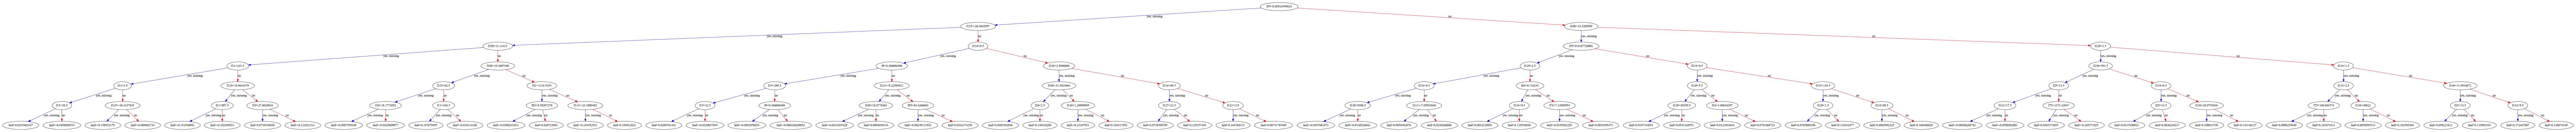

In [22]:
xgb.plot_tree(model, num_trees=3)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(200, 200)

In [23]:
preds = model.predict(testing_data)

In [24]:
preds

array([ 0.58844227,  0.24502304,  0.29374495, ...,  0.8138867 ,
        0.1170366 , -0.19347991], dtype=float32)

In [25]:
"""normalised discounted cumulative gain"""
def NDCG_P(ordered_data, p):
    if sum(ordered_data)==0:
        return 0
    else:
        indexloop = range(0, p)
        DCG_p = 0
        for index in indexloop:
            current_ratio=(2**(ordered_data[index])-1)*(math.log((float(index)+2), 2)**(-1))
            DCG_p = DCG_p + current_ratio
        ordered_data.sort(reverse=True)  
        K = len(ordered_data)
        indexloop = range(0, K)
        iDCG_p = 0
        for index in indexloop:
            current_ratio=(2**(ordered_data[index])-1)*((math.log((index+2), 2))**(-1))
            iDCG_p = iDCG_p + current_ratio
        return(DCG_p/iDCG_p)

In [26]:
f = open('./data/Fold1/test_dat.txt.group', 'r')
x = f.readlines()
groups =[]
for line in x:
    groups.append(int(line))
f.close()

In [27]:
testing_labels = testing_data.get_label()

In [28]:
## compute ndgc for each query.
nquerys=range(0,len(groups))
lower, upper = 0, 0
ndcg_s = []

for i in nquerys:
    many      = groups[i]
    upper     = upper + many
    predicted = preds[lower:upper]
    labled    = testing_labels[lower:upper]
    ordered   = [x for _,x in sorted(zip(predicted,labled), reverse=True)]
    result    = NDCG_P(ordered, many)
    ndcg_s.append(result)
    lower     = upper


In [29]:
ndcg_s

[0.7735824088077096,
 0.7174510655743203,
 0.6222397541973849,
 0.7680343460101877,
 0.7116797158354606,
 0.6892424543342031,
 0.6767447549603944,
 0.684484544488572,
 0.5042952843502639,
 0.33703058448115536,
 0.5571128862314508,
 0.5468257811150922,
 0.6484176390871423,
 0.5944318804050233,
 0.6099730832852256,
 0.7182630449084331,
 0.3125659065928429,
 0.615894870683315,
 0.7017787894645993,
 0.7222224451804313,
 0.892054425845766,
 0.7133316170902744,
 0.7355446821336799,
 0.6940964551013126,
 0.4871002374169577,
 0.6329095243766066,
 0.7272624031750234,
 0.866430697072995,
 0.8884760175333906,
 0.5103112622133129,
 0.6235206242509979,
 0.8426252690629662,
 0.6592808700418653,
 0.6613047301160127,
 0.8027617181086851,
 0.8309896980394547,
 0.876894524548206,
 0.7693837248796724,
 0.8746809352608572,
 0.728619152181154,
 0.6516915970488896,
 0.8360275183863277,
 0.5023824106370693,
 0.7849688885703673,
 0.6729919860925634,
 0.6886547246396036,
 0.7945189942434028,
 0.806395813277360